## Dados & Bibliotecas

In [223]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

# Importando biblioteca para plotagem 3D:
from matplotlib import cm  

# Usando função mágica para plotagem gráfica:
%matplotlib inline

In [224]:
# Definindo a quantidade de amostras:
M = 1000

# Definindo a quantidade de épocas:
n_epochs = 1

# Definição do passo de aprendizagem para GRADIENTE ESTOCÁSTICO PURO:
alpha_sgd = 0.1

# Definição do passo de aprendizagem para GRADIENTE CAÍDA EXPONENCIAL:
alpha_exp = 0.1

# Difinindo o número máximo de iterações
maxNumIter = n_epochs * M

# Reset pseudo random generator.
np.random.seed(42)

In [225]:
# Definindo a função de ENTRADA (features):
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

# Definindo a função de RUÍDO:
w  = np.random.randn(M, 1)

# Definindo a função de SAÍDA (targets):
y_noisy = 2.5 * x1 + 1.3 * x2 + w

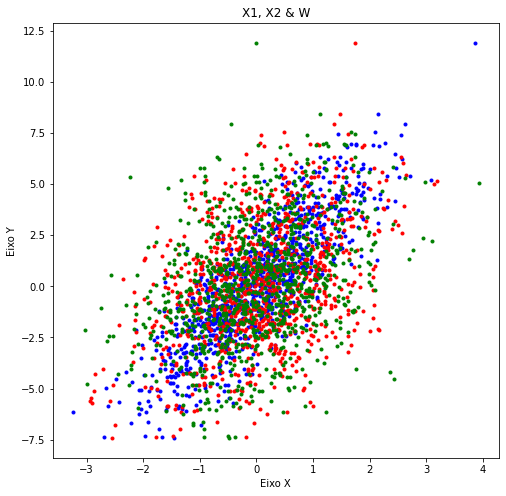

In [226]:
# Plotando os dados gerados:
fig = plt.figure(figsize=(8, 8))
plt.plot(x1, y_noisy, 'b.')
plt.plot(x2, y_noisy, 'r.')
plt.plot(w, y_noisy, 'g.')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('X1, X2 & W')
plt.show()

## Plotagem em 3D

In [227]:
# Criando os parâmetros para a plotagem em 3D

# Definindo o número de iterações:
N = 400

# Definindo valores lINEARMENTE espaçados para os PESOS
a0 = np.linspace(-10.0, 10.0, N)
a1 = np.linspace(-10.0, 10.0, N)

# Criação da malha para plotagem gráfica
A0, A1 = np.meshgrid(a0, a1)

# Criando o vetor para armazenamento dos valores de ERRO:
J =np.zeros((N, N))

#LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A0[iter1][iter2] * x1 + A1[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - y_hat))

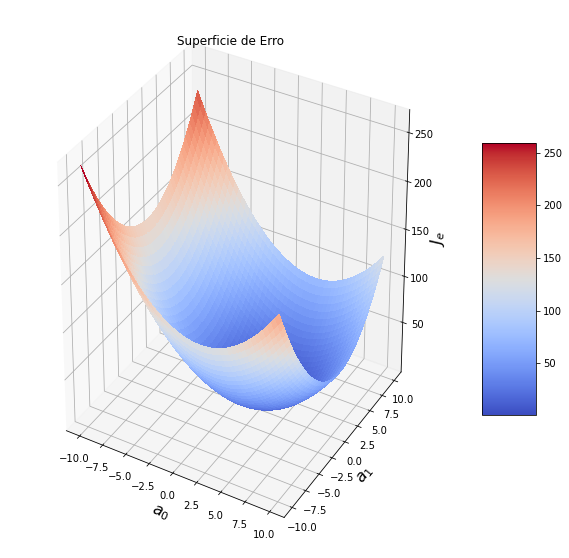

In [228]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

## Formula Fechada

In [229]:
# Concatenando todas as FEATURES:
X = np.c_[x1, x2]

# Aplicando a FORMULA FECHADA:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
y_hat = X.dot(a_opt)
j_opt = (1/M)*np.sum(np.power((y_noisy - y_hat), 2) )

In [230]:
# Imprimindo os pesos ÓTIMOS encontrados pela FORMULA FECHADA:
print('O a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O a1 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))

O a0 ótimo encontrado pela formula fechada é: 2.521947043938519
O a1 ótimo encontrado pela formula fechada é: 1.2902629792949658


## Gradiente Descendente Estocástico PURO

In [323]:
############################## PADRÃO #########################################

# Randomização dos parâmetros:
a = np.array([-10.0, -10.0]).reshape(2, 1)

# Criando os vetores para armazenamento do HISTÓRICO dos pesos:
a_hist = np.zeros((2, maxNumIter + 1))

# Definição do primeiro valor dos pesos para o HISTÓRICO:
a_hist[:, 0] = a.reshape(2,) 

# Create vector to store eta history.
alpha_hist = np.zeros((maxNumIter))

# ????
update_prev = np.zeros((2, 1))

# Criando uma matriz para armazenamento do HISTÓRICO dos ERROS:
Jgd = np.zeros(maxNumIter + 1)

# Definição do vlaor inicial do ERRO:
Jgd[0] = (1.0/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Criando uma matriz para armazenamento do HISTÓRICO do gradiente:
grad_hist = np.zeros((2, n_epochs * M))

# Criando uma matriz para armazenamento da ATUALIZAÇÃO dos pesos:
update_hist = np.zeros((2, maxNumIter))

# Obter sempre os mesmos valores: 
np.random.seed(42)

# Definição do erro inicial:
error = 1

# Definição do Indice inicial:
idx = 0

###############################################################################

In [327]:
# LOOP do gradiente descendente estocástico !!!!!!!PURO!!!!!!!!:
while(error > 0.0001 and idx < maxNumIter-1):   
    random_index = np.random.randint(M)
    xi = X[random_index:random_index+1]
    yi = y_noisy[random_index:random_index+1]
    gradients = -2.0*xi.T.dot(yi - xi.dot(a))
    alpha_hist[idx] = alpha_sgd
    update = alpha_sgd*gradients
    update_hist[:, idx] = update.reshape(2,)
    a = a - update
    a_hist[:, idx+1] = a.reshape(2,)
    update_prev = update
    Jgd[idx+1] = (1.0/M)*sum(np.power((y_noisy - X.dot(a)), 2))
    error = np.abs(Jgd[idx]-Jgd[idx+1])
    idx = idx + 1
        
a_sgd = a

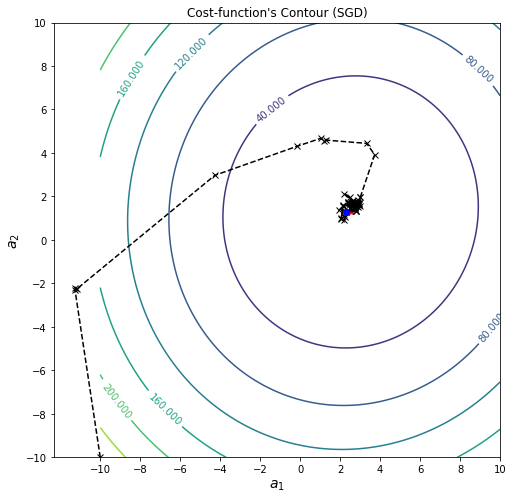

In [328]:
# Plotagem da CURVA DE CONTORNO:       
fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour (SGD)')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:idx+1], a_hist[1, 0:idx+1], 'kx--')
plt.plot(a_hist[0, idx], a_hist[1, idx], 'bo')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

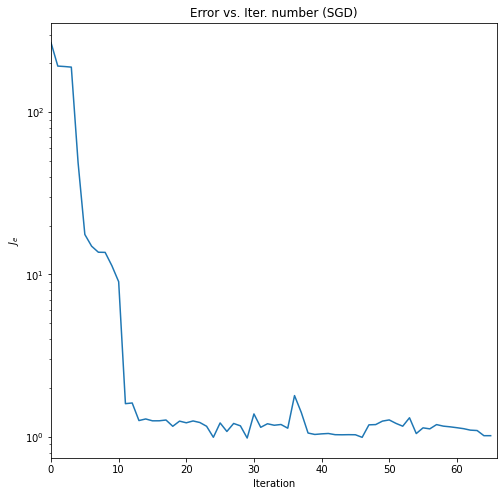

In [330]:
# Plotagem do gráfico de ERRO VS NÚMERO DE ITERAÇÕES:
fig = plt.figure(figsize=(8, 8))
plt.plot(np.arange(0, idx+1), Jgd[0:idx+1])
plt.xlim((0, idx+1))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iter. number (SGD)')
plt.show()

## Decaimento exponencial

In [253]:
# Função de passo de aprendizado com DECAIMENTO EXPONENCIAL:
def exponentialDecay(alpha_int, k, t):
    alpha = alpha_int*np.exp(-k*t)
    return alpha

In [312]:
############################## PADRÃO #########################################

# Randomização dos parâmetros iniciais:
a = np.array([-10.0, -10.0]).reshape(2, 1)

# Criando um vetor para armazenamento do histórico de parâmetros:
a_hist = np.zeros((2, maxNumIter+1))

# Definindo valores iniciais ao vetor de pesos:
a_hist[:, 0] = a.reshape(2,)

# Crinado um vetor para armazenamento dos passos históricos:
alpha_hist = np.zeros((maxNumIter))

# Atualização dos valores de pesos:
update_prev = np.zeros((2, 1))

# Criando uma matriz para armazenamento dos valores de erros:
Jgd = np.zeros(maxNumIter+1)

# Definindo o valor inicial do erro:
Jgd[0] = (1.0/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Criando uma matriz para manter atualizado o histórico:
update_hist = np.zeros((2, maxNumIter))

# Reset pseudo random generator.
np.random.seed(42)

# Definição do valor de ERRO inicial:
error = 1

# Definição do valor de índice inicial:
idx = 0

###############################################################################

In [313]:
# LOOP do gradiente descendente estocástico com DECAIMENTO EXPONENCIAL
while(error > 0.0001 and idx < maxNumIter-1):
    random_index = np.random.randint(M)
    xi = X[random_index:random_index+1]
    yi = y_noisy[random_index:random_index+1]
    gradients = -2.0*xi.T.dot(yi - xi.dot(a))        
    alpha = exponentialDecay(alpha_exp, 0.05, idx)
    alpha_hist[idx] = alpha
    update = alpha*gradients
    update_hist[:, idx] = update.reshape(2,)
    a = a - update
    a_hist[:, idx+1] = a.reshape(2,)
    update_prev = update
    Jgd[idx+1] = (1.0/M)*sum(np.power((y_noisy - X.dot(a)), 2))
    error = np.abs(Jgd[idx]-Jgd[idx+1])
    idx = idx + 1    
        
a_exp = a

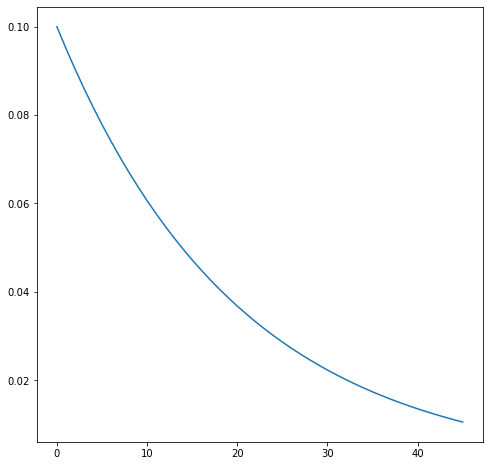

In [314]:
fig = plt.figure(figsize=(8, 8))
plt.plot(alpha_hist[0:idx])
plt.show()

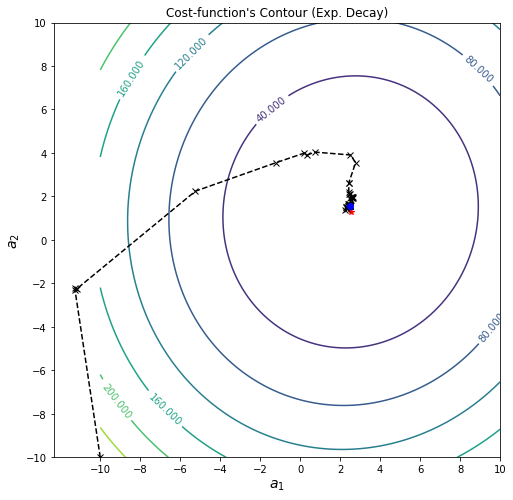

In [315]:
# Plotagem da CURVA DE CONTORNO:       
fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour (Exp. Decay)')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:idx+1], a_hist[1, 0:idx+1], 'kx--')
plt.plot(a_hist[0, idx], a_hist[1, idx], 'bo')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

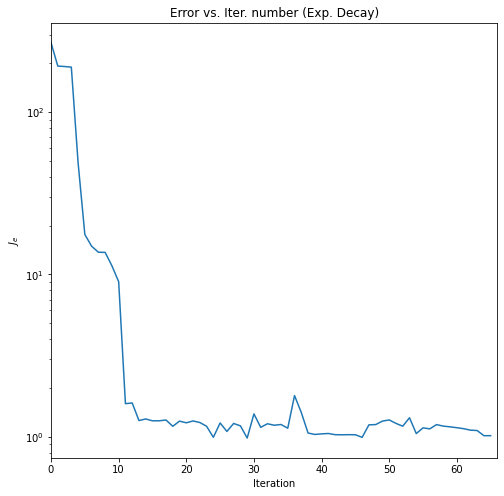

In [329]:
# Plotagem do gráfico de ERRO VS NÚMERO DE ITERAÇÕES:
fig = plt.figure(figsize=(8, 8))
plt.plot(np.arange(0, idx+1), Jgd[0:idx+1])
plt.xlim((0, idx+1))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iter. number (Exp. Decay)')
plt.show()